In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
pip install missingno

  Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Importing Packages
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, norm

In [6]:
Acc_df=pd.read_csv('DfTRoadSafety_Accidents_2012.csv')
Acc_df

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19/01/2012,...,0,5,4,1,1,0,0,1,1,E01002821
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04/01/2012,...,0,0,4,1,1,0,0,1,1,E01004760
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10/01/2012,...,0,4,1,1,1,0,0,1,1,E01002893
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18/01/2012,...,0,0,1,1,1,0,0,1,1,E01002886
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17/01/2012,...,0,0,4,1,1,0,0,1,1,E01002890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145566,2012984140212,303770,610870,-3.520404,55.382366,98,3,2,1,06/12/2012,...,0,0,1,2,3,0,0,2,1,NaN
145567,2012984141412,337350,591392,-2.986151,55.212806,98,3,1,1,20/12/2012,...,0,0,6,2,5,0,0,2,1,NaN
145568,2012984141912,303700,611250,-3.521639,55.385766,98,3,1,1,22/12/2012,...,0,0,1,5,2,0,0,2,1,NaN
145569,2012984142512,309250,581750,-3.424552,55.121821,98,3,1,2,25/12/2012,...,0,0,1,1,2,0,0,2,1,NaN


In [7]:
Acc_df = Acc_df.rename(columns={'Local_Authority_(District)': 'local_auth_district', 'Local_Authority_(Highway)': 'local_auth_highway','1st_Road_Class':'first_Road_class',
                                  '2nd_Road_Class':'second_Road_class','Pedestrian_Crossing-Human_Control':'Ped_cross_Hum_cntrl',
                                'Pedestrian_Crossing-Physical_Facilities':'Ped_cross_Phy_Fac','Did_Police_Officer_Attend_Scene_of_Accident':'Police_Attend'})
Acc_df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'local_auth_district', 'local_auth_highway', 'first_Road_class',
       '1st_Road_Number', 'Road_Type', 'Speed_limit', 'Junction_Detail',
       'Junction_Control', 'second_Road_class', '2nd_Road_Number',
       'Ped_cross_Hum_cntrl', 'Ped_cross_Phy_Fac', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Police_Attend', 'LSOA_of_Accident_Location'],
      dtype='object')

In [8]:
import pandas as pd

# Replace 'your_excel_file.xlsx' with the actual path to your Excel file.
excel_file_path = 'Road-Accident-Safety-Data-Guide.xls.xlsx'

# Read all sheets into a dictionary of DataFrames
dfs = pd.read_excel(excel_file_path, sheet_name=None)

# Access a specific DataFrame by sheet name
Accident_Severity = dfs['Accident Severity'] 
Police_Force = dfs['Police Force']
Day_of_Week = dfs['Day of Week']
Local_Authority_District = dfs['Local Authority (District)']
Local_Authority_Highway = dfs['Local Authority (Highway)']
first_Road_class=dfs['1st Road Class']
Road_Type = dfs['Road Type']
Junction_Detail = dfs['Junction Detail']
Junction_Control = dfs['Junction Control']
second_Road_Class=dfs['2nd Road Class']
Pedestrian_Crossing_Human_Control=dfs['Ped Cross - Human']
Pedestrian_Crossing_Physical_Facilities=dfs['Ped Cross - Physical']
Light_Conditions = dfs['Light Conditions']
Weather_Conditions = dfs['Weather']
Road_Surface_Conditions = dfs['Road Surface']
Special_Conditions_at_Site = dfs['Special Conditions at Site']
Carriageway_Hazards=dfs['Carriageway Hazards']
Urban_or_Rural_Area = dfs['Urban Rural']
Did_Police_Officer_Attend_Scene_of_Accident = dfs['Police Officer Attend']

In [10]:
Accident_Severity_dict=Accident_Severity.set_index('code')['label'].to_dict()
Police_Force_dict=Police_Force.set_index('code')['label'].to_dict()
Day_of_Week_dict=Day_of_Week.set_index('code')['label'].to_dict()
Local_Authority_District_dict=Local_Authority_District.set_index('code')['label'].to_dict()
Local_Authority_Highway_dict=Local_Authority_Highway.set_index('Code')['Label'].to_dict()
first_Road_class_dict=first_Road_class.set_index('code')['label'].to_dict()
Road_Type_dict=Road_Type.set_index('code')['label'].to_dict()
Junction_Detail_dict=Junction_Detail.set_index('code')['label'].to_dict()
Junction_Control_dict=Junction_Control.set_index('code')['label'].to_dict()
second_Road_Class_dict=second_Road_Class.set_index('code')['label'].to_dict()
Pedestrian_Crossing_Human_Control_dict=Pedestrian_Crossing_Human_Control.set_index('code')['label'].to_dict()
Pedestrian_Crossing_Physical_Facilities_dict=Pedestrian_Crossing_Physical_Facilities.set_index('code')['label'].to_dict()
Light_Conditions_dict=Light_Conditions.set_index('code')['label'].to_dict()
Weather_Conditions_dict=Weather_Conditions.set_index('code')['label'].to_dict()
Road_Surface_Conditions_dict=Road_Surface_Conditions.set_index('code')['label'].to_dict()
Special_Conditions_at_Site_dict=Special_Conditions_at_Site.set_index('code')['label'].to_dict()
Carriageway_Hazards_dict=Carriageway_Hazards.set_index('code')['label'].to_dict()
Urban_or_Rural_Area_dict=Urban_or_Rural_Area.set_index('code')['label'].to_dict()
Did_Police_Officer_Attend_Scene_of_Accident_dict=Did_Police_Officer_Attend_Scene_of_Accident.set_index('code')['label'].to_dict()

In [11]:
Acc_df['Accident_Severity'] = Acc_df['Accident_Severity'].replace(Accident_Severity_dict)
Acc_df['Police_Force'] = Acc_df['Police_Force'].replace(Police_Force_dict)
Acc_df['Day_of_Week'] = Acc_df['Day_of_Week'].replace(Day_of_Week_dict)
Acc_df['local_auth_district'] = Acc_df['local_auth_district'].replace(Local_Authority_District_dict)
Acc_df['local_auth_highway'] = Acc_df['local_auth_highway'].replace(Local_Authority_Highway_dict)
Acc_df['first_Road_class'] = Acc_df['first_Road_class'].replace(first_Road_class_dict)
Acc_df['Road_Type'] = Acc_df['Road_Type'].replace(Road_Type_dict)
Acc_df['Junction_Detail'] = Acc_df['Junction_Detail'].replace(Junction_Detail_dict)
Acc_df['Junction_Control'] = Acc_df['Junction_Control'].replace(Junction_Control_dict)
Acc_df['second_Road_class'] = Acc_df['second_Road_class'].replace(second_Road_Class_dict)
Acc_df['Ped_cross_Hum_cntrl'] = Acc_df['Ped_cross_Hum_cntrl'].replace(Pedestrian_Crossing_Human_Control_dict)
Acc_df['Ped_cross_Phy_Fac'] = Acc_df['Ped_cross_Phy_Fac'].replace(Pedestrian_Crossing_Physical_Facilities_dict)
Acc_df['Light_Conditions'] = Acc_df['Light_Conditions'].replace(Light_Conditions_dict)
Acc_df['Weather_Conditions'] = Acc_df['Weather_Conditions'].replace(Weather_Conditions_dict)
Acc_df['Road_Surface_Conditions'] = Acc_df['Road_Surface_Conditions'].replace(Road_Surface_Conditions_dict)
Acc_df['Special_Conditions_at_Site'] = Acc_df['Special_Conditions_at_Site'].replace(Special_Conditions_at_Site_dict)
Acc_df['Carriageway_Hazards'] = Acc_df['Carriageway_Hazards'].replace(Carriageway_Hazards_dict)
Acc_df['Urban_or_Rural_Area'] = Acc_df['Urban_or_Rural_Area'].replace(Urban_or_Rural_Area_dict)
Acc_df['Police_Attend'] = Acc_df['Police_Attend'].replace(Did_Police_Officer_Attend_Scene_of_Accident_dict)

In [12]:
Acc_df

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Ped_cross_Hum_cntrl,Ped_cross_Phy_Fac,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Police_Attend,LSOA_of_Accident_Location
0,201201BS70001,527200,178760,-0.169101,51.493429,Metropolitan Police,Slight,2,1,19/01/2012,...,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,E01002821
1,201201BS70002,524930,181430,-0.200838,51.517931,Metropolitan Police,Slight,2,1,04/01/2012,...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,E01004760
2,201201BS70003,525860,178080,-0.188636,51.487618,Metropolitan Police,Slight,2,1,10/01/2012,...,None within 50 metres,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Fine no high winds,Dry,None,None,Urban,Yes,E01002893
3,201201BS70004,524980,181030,-0.200259,51.514325,Metropolitan Police,Slight,1,1,18/01/2012,...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,E01002886
4,201201BS70005,526170,179200,-0.183773,51.497614,Metropolitan Police,Slight,1,1,17/01/2012,...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,E01002890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145566,2012984140212,303770,610870,-3.520404,55.382366,Dumfries and Galloway,Slight,2,1,06/12/2012,...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining no high winds,Snow,None,None,Rural,Yes,NaN
145567,2012984141412,337350,591392,-2.986151,55.212806,Dumfries and Galloway,Slight,1,1,20/12/2012,...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Raining no high winds,Flood over 3cm. deep,None,None,Rural,Yes,NaN
145568,2012984141912,303700,611250,-3.521639,55.385766,Dumfries and Galloway,Slight,1,1,22/12/2012,...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining + high winds,Wet or damp,None,None,Rural,Yes,NaN
145569,2012984142512,309250,581750,-3.424552,55.121821,Dumfries and Galloway,Slight,1,2,25/12/2012,...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None,Rural,Yes,NaN


## Dataset Description

In [13]:
Acc_df.shape

(145571, 32)

In [14]:
Acc_df.head().T

,0,1,2,3,4
Accident_Index,201201BS70001,201201BS70002,201201BS70003,201201BS70004,201201BS70005
Location_Easting_OSGR,527200,524930,525860,524980,526170
Location_Northing_OSGR,178760,181430,178080,181030,179200
Longitude,-0.169101,-0.200838,-0.188636,-0.200259,-0.183773
Latitude,51.493429,51.517931,51.487618,51.514325,51.497614
Police_Force,Metropolitan Police,Metropolitan Police,Metropolitan Police,Metropolitan Police,Metropolitan Police
Accident_Severity,Slight,Slight,Slight,Slight,Slight
Number_of_Vehicles,2,2,2,1,1
Number_of_Casualties,1,1,1,1,1
Date,19/01/2012,04/01/2012,10/01/2012,18/01/2012,17/01/2012


In [11]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(Acc_df, title="Profiling Report")
# profile

## Data Cleaning

In [15]:
Acc_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Accident_Index,145571,145571,201201BS70001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location_Easting_OSGR,145571.0,NaN,NaN,NaN,443693.792376,95370.838711,65510.0,380033.0,447135.0,525380.0,655370.0
Location_Northing_OSGR,145571.0,NaN,NaN,NaN,296207.128961,161582.89431,10404.0,177290.0,254896.0,395110.0,1189010.0
Longitude,145571.0,NaN,NaN,NaN,-1.377496,1.401871,-7.509162,-2.300453,-1.303996,-0.192438,1.759382
Latitude,145571.0,NaN,NaN,NaN,52.553532,1.455025,49.914145,51.48158,52.182629,53.450663,60.583032
Police_Force,145571,51,Metropolitan Police,23721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Accident_Severity,145571,3,Slight,123033,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_Vehicles,145571.0,NaN,NaN,NaN,1.826442,0.703703,1.0,1.0,2.0,2.0,18.0
Number_of_Casualties,145571.0,NaN,NaN,NaN,1.344519,0.805668,1.0,1.0,1.0,1.0,42.0
Date,145571,366,25/05/2012,612,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
acc_subset = Acc_df[['Accident_Index', 'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'local_auth_district', 'local_auth_highway', 'first_Road_class',
       'Road_Type', 'Speed_limit', 'Junction_Detail',
       'Junction_Control', 'second_Road_class',
       'Ped_cross_Hum_cntrl', 'Ped_cross_Phy_Fac', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Urban_or_Rural_Area', 'Police_Attend']]
acc_subset

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Junction_Detail,Junction_Control,second_Road_class,Ped_cross_Hum_cntrl,Ped_cross_Phy_Fac,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Police_Attend
0,201201BS70001,-0.169101,51.493429,Metropolitan Police,Slight,2,1,19/01/2012,Thursday,20:35,...,Crossroads,Auto traffic signal,C,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,Fine no high winds,Dry,Urban,Yes
1,201201BS70002,-0.200838,51.517931,Metropolitan Police,Slight,2,1,04/01/2012,Wednesday,17:00,...,T or staggered junction,Give way or uncontrolled,Unclassified,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,Urban,Yes
2,201201BS70003,-0.188636,51.487618,Metropolitan Police,Slight,2,1,10/01/2012,Tuesday,10:07,...,Crossroads,Give way or uncontrolled,Unclassified,None within 50 metres,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Fine no high winds,Dry,Urban,Yes
3,201201BS70004,-0.200259,51.514325,Metropolitan Police,Slight,1,1,18/01/2012,Wednesday,12:20,...,T or staggered junction,Give way or uncontrolled,Unclassified,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,Urban,Yes
4,201201BS70005,-0.183773,51.497614,Metropolitan Police,Slight,1,1,17/01/2012,Tuesday,20:24,...,T or staggered junction,Give way or uncontrolled,Unclassified,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,Urban,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145566,2012984140212,-3.520404,55.382366,Dumfries and Galloway,Slight,2,1,06/12/2012,Thursday,12:45,...,Not at junction or within 20 metres,Data missing or out of range,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining no high winds,Snow,Rural,Yes
145567,2012984141412,-2.986151,55.212806,Dumfries and Galloway,Slight,1,1,20/12/2012,Thursday,20:00,...,Not at junction or within 20 metres,Data missing or out of range,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Raining no high winds,Flood over 3cm. deep,Rural,Yes
145568,2012984141912,-3.521639,55.385766,Dumfries and Galloway,Slight,1,1,22/12/2012,Saturday,13:01,...,Not at junction or within 20 metres,Data missing or out of range,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining + high winds,Wet or damp,Rural,Yes
145569,2012984142512,-3.424552,55.121821,Dumfries and Galloway,Slight,1,2,25/12/2012,Tuesday,11:33,...,Not at junction or within 20 metres,Data missing or out of range,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,Rural,Yes


In [17]:
acc_subset.dtypes

Accident_Index              object
Longitude                  float64
Latitude                   float64
Police_Force                object
Accident_Severity           object
Number_of_Vehicles           int64
Number_of_Casualties         int64
Date                        object
Day_of_Week                 object
Time                        object
local_auth_district         object
local_auth_highway          object
first_Road_class            object
Road_Type                   object
Speed_limit                  int64
Junction_Detail             object
Junction_Control            object
second_Road_class           object
Ped_cross_Hum_cntrl         object
Ped_cross_Phy_Fac           object
Light_Conditions            object
Weather_Conditions          object
Road_Surface_Conditions     object
Urban_or_Rural_Area         object
Police_Attend               object
dtype: object

In [18]:
acc_subset = acc_subset.convert_dtypes()
acc_subset.dtypes

Accident_Index              string
Longitude                  Float64
Latitude                   Float64
Police_Force                string
Accident_Severity           string
Number_of_Vehicles           Int64
Number_of_Casualties         Int64
Date                        string
Day_of_Week                 string
Time                        string
local_auth_district         string
local_auth_highway          string
first_Road_class            string
Road_Type                   string
Speed_limit                  Int64
Junction_Detail             string
Junction_Control            string
second_Road_class           object
Ped_cross_Hum_cntrl         string
Ped_cross_Phy_Fac           string
Light_Conditions            string
Weather_Conditions          string
Road_Surface_Conditions     string
Urban_or_Rural_Area         string
Police_Attend               string
dtype: object

### Analysis of missing values

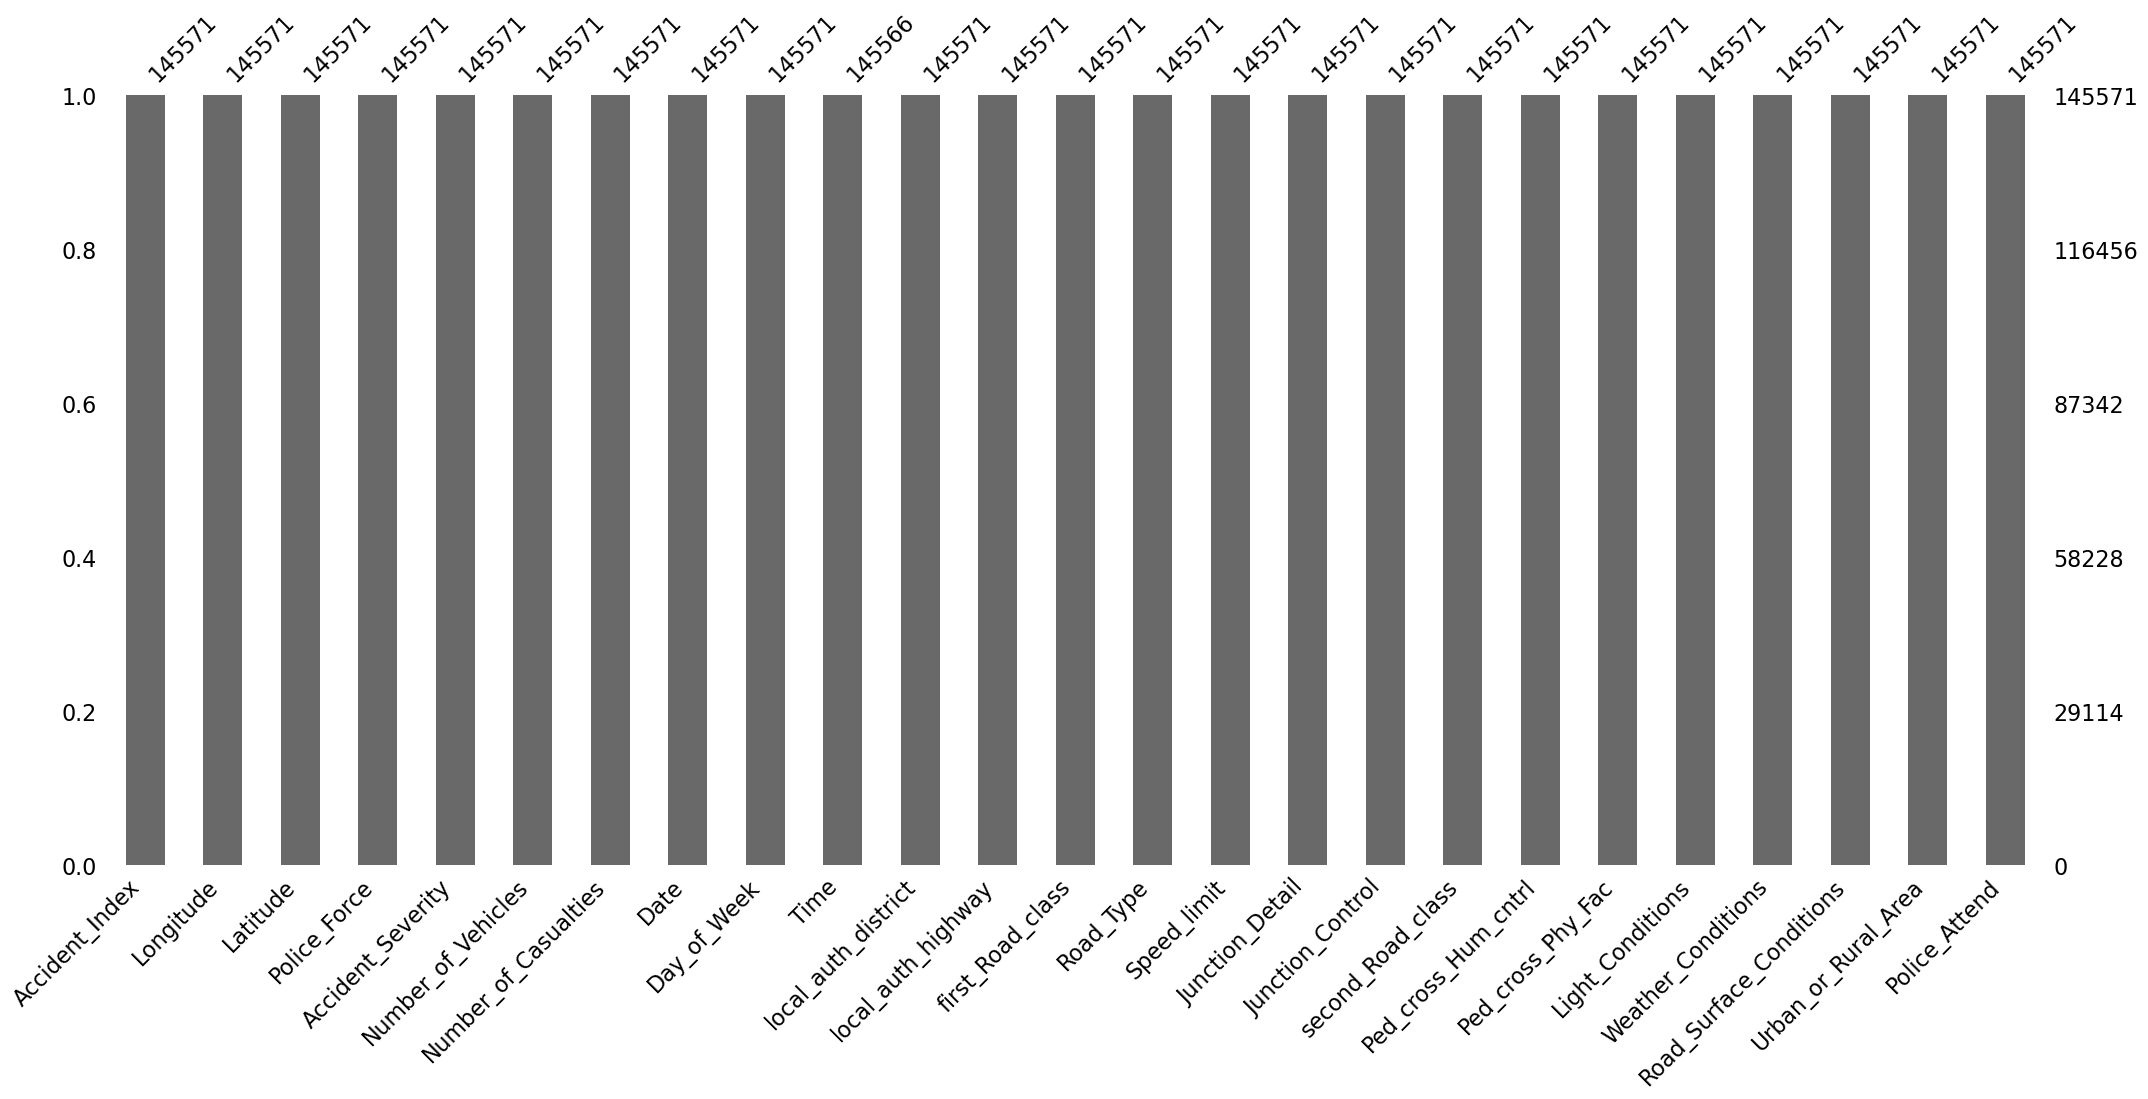

In [16]:
msno.bar(acc_subset)
plt.show()

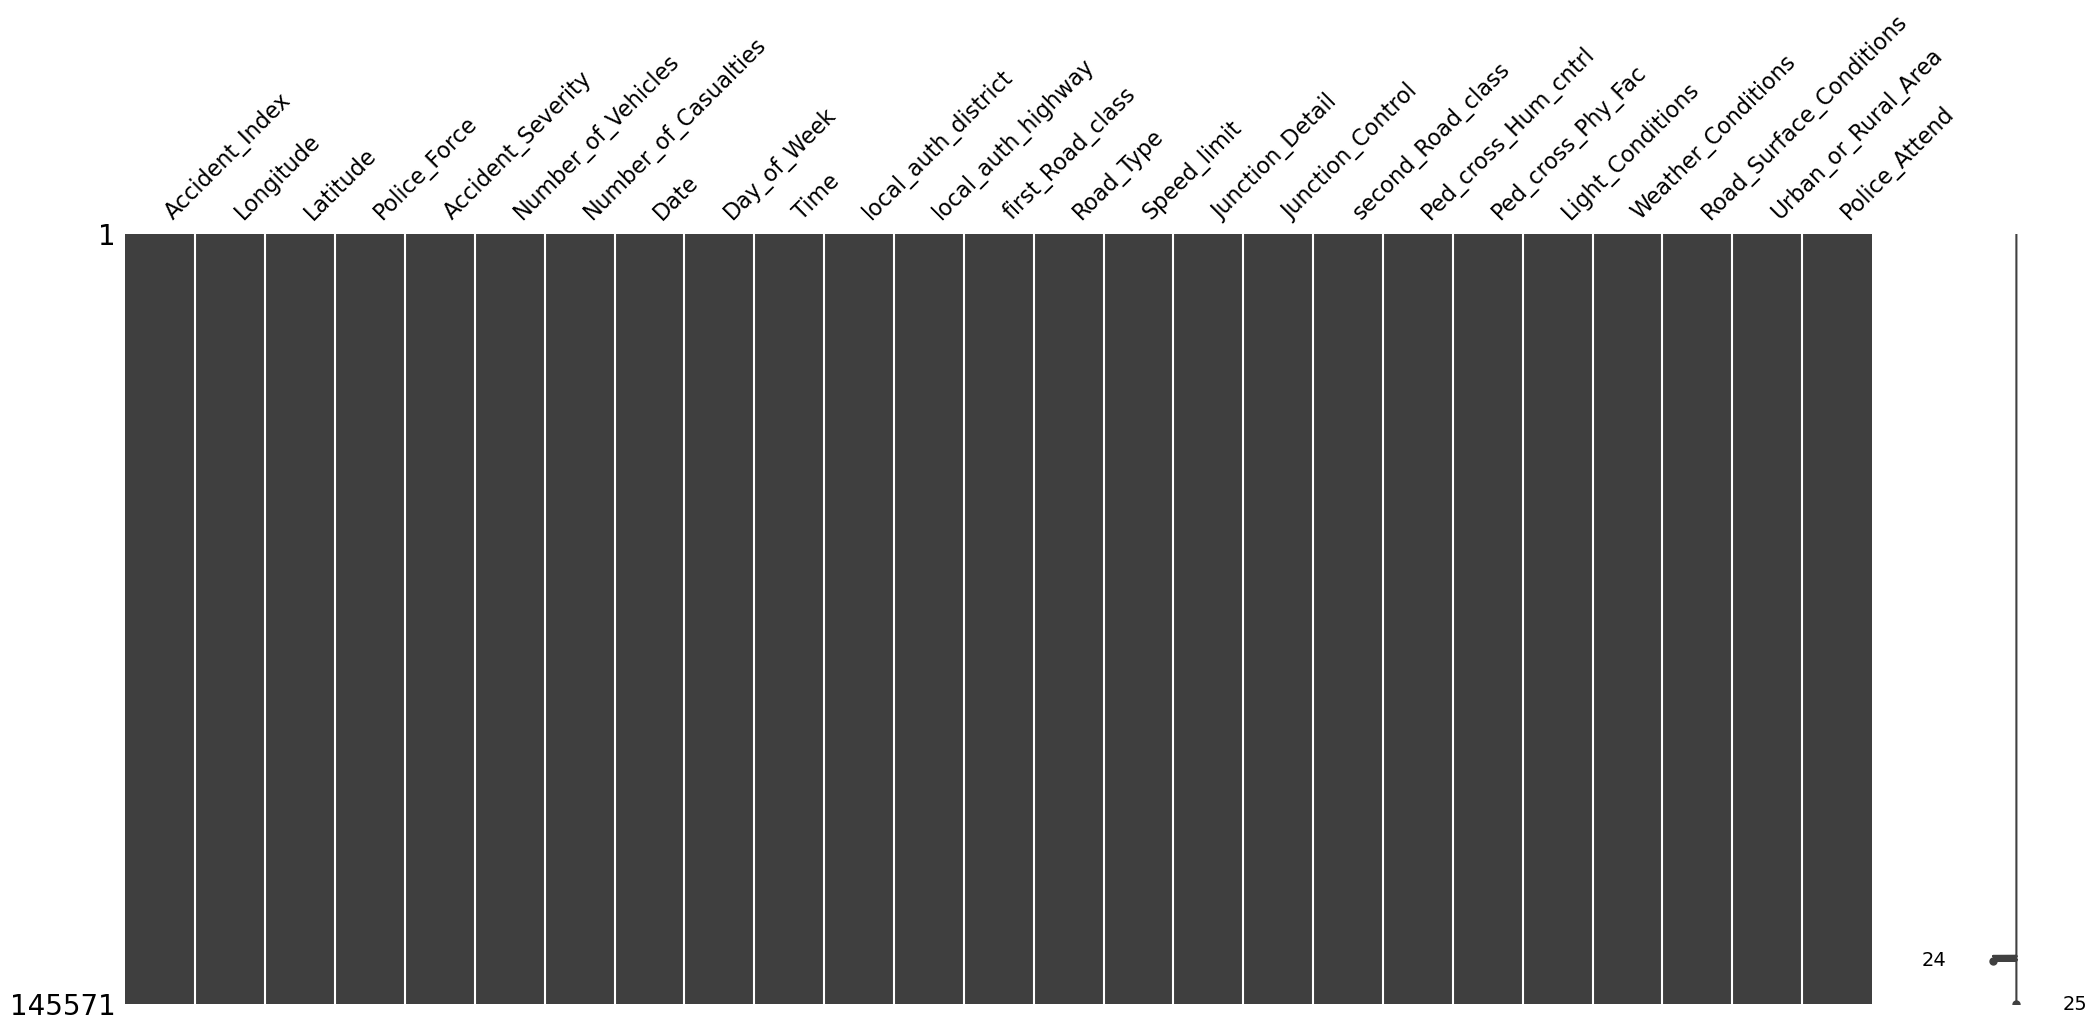

In [17]:
msno.matrix(acc_subset)
plt.show()

### Handling missing values

In [19]:
acc_subset.isnull().sum()

Accident_Index             0
Longitude                  0
Latitude                   0
Police_Force               0
Accident_Severity          0
Number_of_Vehicles         0
Number_of_Casualties       0
Date                       0
Day_of_Week                0
Time                       5
local_auth_district        0
local_auth_highway         0
first_Road_class           0
Road_Type                  0
Speed_limit                0
Junction_Detail            0
Junction_Control           0
second_Road_class          0
Ped_cross_Hum_cntrl        0
Ped_cross_Phy_Fac          0
Light_Conditions           0
Weather_Conditions         0
Road_Surface_Conditions    0
Urban_or_Rural_Area        0
Police_Attend              0
dtype: int64

In [20]:
acc_subset = acc_subset.drop_duplicates(subset=["Accident_Index"])
acc_subset

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Junction_Detail,Junction_Control,second_Road_class,Ped_cross_Hum_cntrl,Ped_cross_Phy_Fac,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Police_Attend
0,201201BS70001,-0.169101,51.493429,Metropolitan Police,Slight,2,1,19/01/2012,Thursday,20:35,...,Crossroads,Auto traffic signal,C,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,Fine no high winds,Dry,Urban,Yes
1,201201BS70002,-0.200838,51.517931,Metropolitan Police,Slight,2,1,04/01/2012,Wednesday,17:00,...,T or staggered junction,Give way or uncontrolled,Unclassified,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,Urban,Yes
2,201201BS70003,-0.188636,51.487618,Metropolitan Police,Slight,2,1,10/01/2012,Tuesday,10:07,...,Crossroads,Give way or uncontrolled,Unclassified,None within 50 metres,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Fine no high winds,Dry,Urban,Yes
3,201201BS70004,-0.200259,51.514325,Metropolitan Police,Slight,1,1,18/01/2012,Wednesday,12:20,...,T or staggered junction,Give way or uncontrolled,Unclassified,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,Urban,Yes
4,201201BS70005,-0.183773,51.497614,Metropolitan Police,Slight,1,1,17/01/2012,Tuesday,20:24,...,T or staggered junction,Give way or uncontrolled,Unclassified,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,Urban,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145566,2012984140212,-3.520404,55.382366,Dumfries and Galloway,Slight,2,1,06/12/2012,Thursday,12:45,...,Not at junction or within 20 metres,Data missing or out of range,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining no high winds,Snow,Rural,Yes
145567,2012984141412,-2.986151,55.212806,Dumfries and Galloway,Slight,1,1,20/12/2012,Thursday,20:00,...,Not at junction or within 20 metres,Data missing or out of range,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Raining no high winds,Flood over 3cm. deep,Rural,Yes
145568,2012984141912,-3.521639,55.385766,Dumfries and Galloway,Slight,1,1,22/12/2012,Saturday,13:01,...,Not at junction or within 20 metres,Data missing or out of range,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining + high winds,Wet or damp,Rural,Yes
145569,2012984142512,-3.424552,55.121821,Dumfries and Galloway,Slight,1,2,25/12/2012,Tuesday,11:33,...,Not at junction or within 20 metres,Data missing or out of range,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,Rural,Yes


<Axes: >

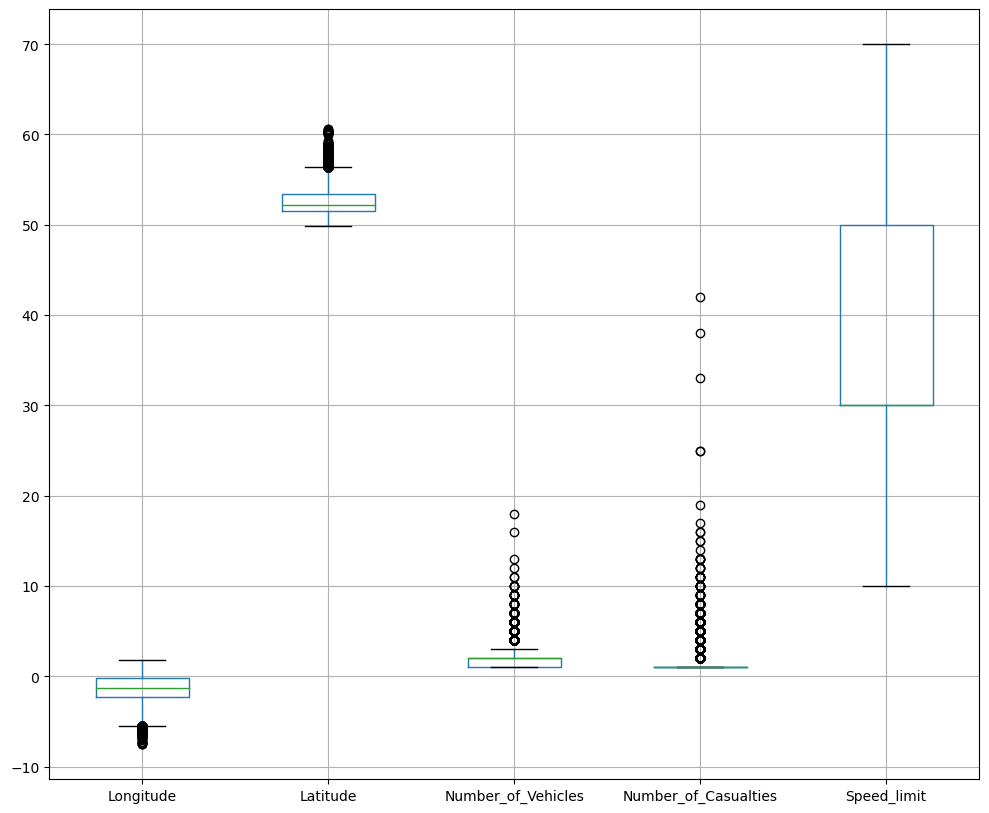

In [21]:
#Checking for outliers using boxplot
plt.figure(figsize=(12,10))
acc_subset.boxplot()

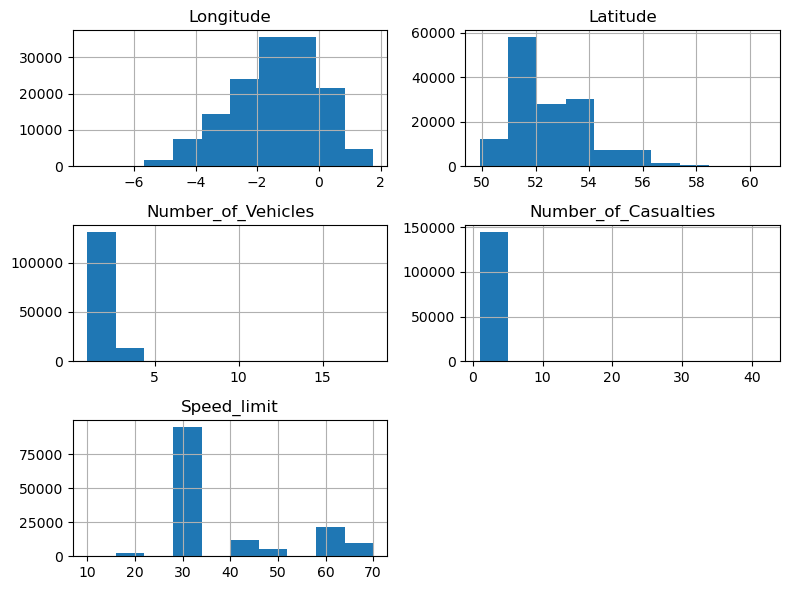

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot your histogram on the specified axis (ax)
acc_subset.hist(ax=ax)
plt.tight_layout()
# Show the plot
plt.show()

In [29]:
# pip install folium

In [30]:
# import folium

# # Create a map centered on a specific location (you can choose a central point based on your data)
# m = folium.Map(location=[-0.169101, 51.493429], zoom_start=12)

# # Add markers for each point in your dataset (assuming you have latitude and longitude columns)
# for index, row in acc_subset.iterrows():
#     folium.Marker([row['Latitude'], row['Longitude']]).add_to(m)

# # Display the map
# m.save("your_map.html")


In [31]:
# m

In [18]:
## Drop columns
#'1st_Road_Number','2nd_Road_Number'